In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [38]:
df = pd.read_csv("/content/penguins.csv")
species = df['species'].unique()
island = df['island'].unique()
sex =  df['sex'].unique()
sex = [x for x in sex if str(x) != 'nan']
df = df.rename(columns={'bill_length_mm': 'culmen_length_mm', 'bill_depth_mm': 'culmen_depth_mm'})
print(species,island,sex)

['Adelie' 'Gentoo' 'Chinstrap'] ['Torgersen' 'Biscoe' 'Dream'] ['male', 'female']


In [39]:
print(df.info())
print(df.columns)
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB
None
Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')
species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   obje

In [40]:
specie=(df['species'].value_counts())
n_islands=df['island'].value_counts()
print(n_islands)
print(specie)

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64


In [41]:
#Statistics
print(df.std())

culmen_length_mm       5.459584
culmen_depth_mm        1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
year                   0.818356
dtype: float64


<ipython-input-41-c5e34e0d241e>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.std())


In [42]:
print(df.mean())

culmen_length_mm       43.921930
culmen_depth_mm        17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
year                 2008.029070
dtype: float64


<ipython-input-42-f98cceecb4a0>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.mean())


In [43]:
print(df.shape)

(344, 8)


In [44]:
#Convert features with string datatype to categorical (species, island, sex).
island_to_int = dict((c, i) for i, c in enumerate(island))
int_to_island = dict((i, c) for i, c in enumerate(island))
print(island_to_int,int_to_island)
for island in island_to_int:
  df = df.replace(to_replace=island,
           value=island_to_int[island])
species_to_int = dict((c, i) for i, c in enumerate(species))
int_to_species = dict((i, c) for i, c in enumerate(species))
print(species_to_int,int_to_species)
for species in species_to_int:
  df = df.replace(to_replace=species,
           value=species_to_int[species])
sex_to_int = dict((c, i) for i, c in enumerate(sex))
int_to_sex = dict((i, c) for i, c in enumerate(sex))
print(sex_to_int,int_to_sex )
for sex in sex_to_int:
  df = df.replace(to_replace=sex,
           value=sex_to_int[sex])

{'Torgersen': 0, 'Biscoe': 1, 'Dream': 2} {0: 'Torgersen', 1: 'Biscoe', 2: 'Dream'}
{'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2} {0: 'Adelie', 1: 'Gentoo', 2: 'Chinstrap'}
{'male': 0, 'female': 1} {0: 'male', 1: 'female'}


In [45]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,0,39.1,18.7,181.0,3750.0,0.0,2007
1,0,0,39.5,17.4,186.0,3800.0,1.0,2007
2,0,0,40.3,18.0,195.0,3250.0,1.0,2007
3,0,0,NaN,NaN,NaN,NaN,NaN,2007
4,0,0,36.7,19.3,193.0,3450.0,1.0,2007
...,...,...,...,...,...,...,...,...
339,2,2,55.8,19.8,207.0,4000.0,0.0,2009
340,2,2,43.5,18.1,202.0,3400.0,1.0,2009
341,2,2,49.6,18.2,193.0,3775.0,0.0,2009
342,2,2,50.8,19.0,210.0,4100.0,0.0,2009


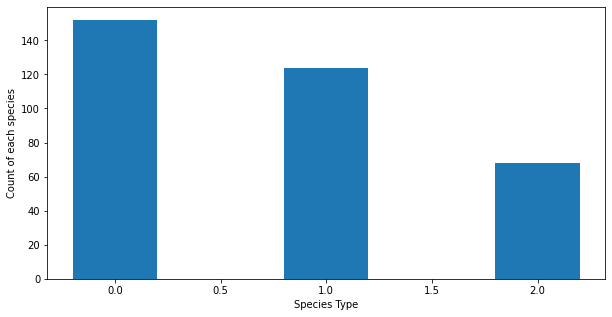

In [46]:
''' Penguin ("penguin.csv"): total number of penguins between range of body mass
Plot a graph which shows the total number of penguins having body_mass_g between 3200 and 4500
'''

# BEGIN YOUR CODE
x = df[(df['body_mass_g']>3200) & (df['body_mass_g']<4500)]
l = x['species'].unique()
data={}
for s in l:
  data[s]=df['species'].value_counts()[s]

x = data.keys()
y = data.values()
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y,
        width = 0.4)
 
plt.xlabel("Species Type")
plt.ylabel("Count of each species")
plt.show()
# END YOUR CODE

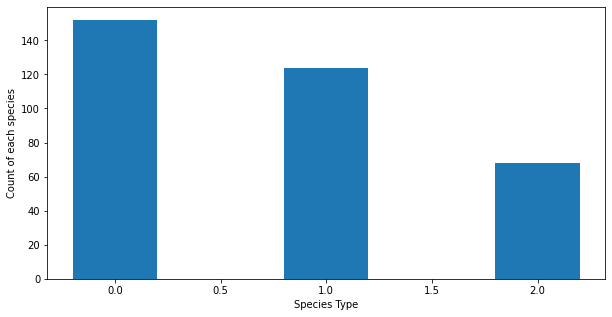

In [47]:
''' Penguin ("penguin.csv"): total number of penguins per Species
Plot a graph which shows the total number of penguins per species
'''

# BEGIN YOUR CODE
import pandas as pd
l = df['species'].unique()
data={}
for s in l:
  data[s]=df['species'].value_counts()[s]
x = data.keys()
y = data.values()
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, width = 0.4)
 
plt.xlabel("Species Type")
plt.ylabel("Count of each species")
plt.show()
# END YOUR CODE

In [48]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,0,39.1,18.7,181.0,3750.0,0.0,2007
1,0,0,39.5,17.4,186.0,3800.0,1.0,2007
2,0,0,40.3,18.0,195.0,3250.0,1.0,2007
3,0,0,NaN,NaN,NaN,NaN,NaN,2007
4,0,0,36.7,19.3,193.0,3450.0,1.0,2007
...,...,...,...,...,...,...,...,...
339,2,2,55.8,19.8,207.0,4000.0,0.0,2009
340,2,2,43.5,18.1,202.0,3400.0,1.0,2009
341,2,2,49.6,18.2,193.0,3775.0,0.0,2009
342,2,2,50.8,19.0,210.0,4100.0,0.0,2009


In [49]:
# #Normalize non-categorical features (culmen_length_mm, culmen_depth_mm,
# flipper_length_mm, body_mass_g).
# a. Find the min and max values for each column.
# b. Rescale dataset columns to the range from 0 to 1
# Why do we do this? Normalization is to transform features to be on a similar
# scale. This improves the performance and training stability of the model.
# Note: normalize() is not allowed as it is a part of scikit-learn library"
df_min_max_scaled = df.copy()
columns = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
for column in columns:
  df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())            
df = df_min_max_scaled
columns = list(df.columns)
#replace missing values
for column in columns:
  if column!='sex':
    df[column] = df[column].fillna(df[column].mean())

In [50]:
df = df.dropna()
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,0,0.254545,0.666667,0.152542,0.291667,0.0,2007
1,0,0,0.269091,0.511905,0.237288,0.305556,1.0,2007
2,0,0,0.298182,0.583333,0.389831,0.152778,1.0,2007
4,0,0,0.167273,0.738095,0.355932,0.208333,1.0,2007
5,0,0,0.261818,0.892857,0.305085,0.263889,0.0,2007
...,...,...,...,...,...,...,...,...
339,2,2,0.861818,0.797619,0.593220,0.361111,0.0,2009
340,2,2,0.414545,0.595238,0.508475,0.194444,1.0,2009
341,2,2,0.636364,0.607143,0.355932,0.298611,0.0,2009
342,2,2,0.680000,0.702381,0.644068,0.388889,0.0,2009


In [51]:
print(df.shape[0],df.shape[1])

333 8


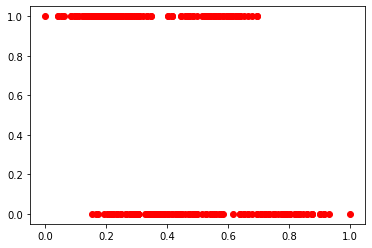

In [52]:
plt.scatter(df['body_mass_g'],df['sex'],c='red')
plt.show() 

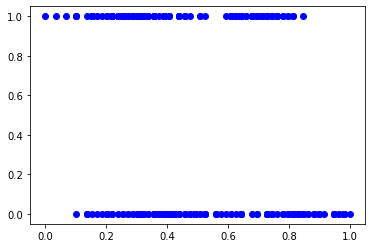

In [53]:
plt.scatter(df['flipper_length_mm'],df['sex'],c='blue')
plt.show()

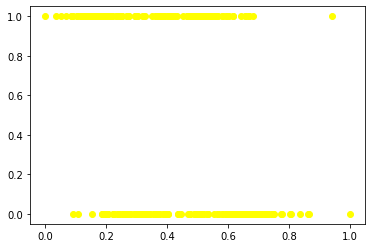

In [54]:
plt.scatter(df['culmen_length_mm'],df['sex'],color='yellow')
plt.show()

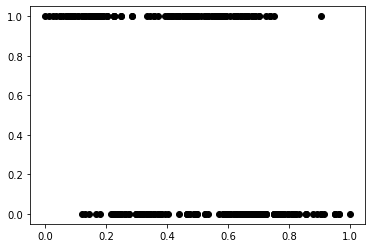

In [55]:
plt.scatter(df['culmen_depth_mm'],df['sex'],color='black')
plt.show()

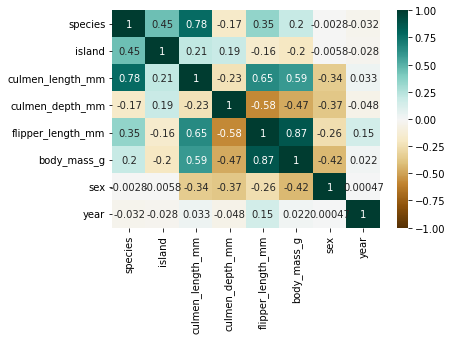

In [56]:
#Creating a correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
df.corr()
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [57]:
#The output variable sex has maximum correlation with species,island, flipper_length_mm, and culmen_length_mm from the correlation matrix
#Input  N x 4 dim

X = pd.concat([df['species'], df['island'],df['flipper_length_mm'],df['culmen_length_mm']], axis = 1)
print(X)


     species  island  flipper_length_mm  culmen_length_mm
0          0       0           0.152542          0.254545
1          0       0           0.237288          0.269091
2          0       0           0.389831          0.298182
4          0       0           0.355932          0.167273
5          0       0           0.305085          0.261818
..       ...     ...                ...               ...
339        2       2           0.593220          0.861818
340        2       2           0.508475          0.414545
341        2       2           0.355932          0.636364
342        2       2           0.644068          0.680000
343        2       2           0.440678          0.658182

[333 rows x 4 columns]


In [58]:
#Output the sex column NX1 matrix
y=df['sex']
print(y.shape)
print(y)

(333,)
0      0.0
1      1.0
2      1.0
4      1.0
5      0.0
      ... 
339    0.0
340    1.0
341    0.0
342    0.0
343    1.0
Name: sex, Length: 333, dtype: float64


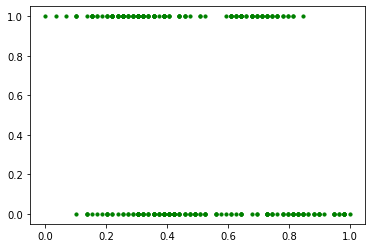

In [59]:
plt.scatter(df['flipper_length_mm'],df['sex'],color='green',s=10)
plt.show()

In [60]:
# Divide the dataset into training and test, as 80% training, 20% testing dataset.
# Train test split without using scikit learn

shuffle_df = df.sample(frac=1)
train_size = int(0.8 * len(df))
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]
x_train = pd.concat([train_set['species'],train_set['island'],train_set['flipper_length_mm'],train_set['culmen_length_mm']], axis = 1)
x_test = pd.concat([test_set['species'],test_set['island'],test_set['flipper_length_mm'],test_set['culmen_length_mm']], axis = 1)
y_train, y_test = train_set["sex"],test_set["sex"]
print(x_train.shape, x_test.shape,y_train.shape, y_test.shape)

(266, 4) (67, 4) (266,) (67,)


In [62]:
class LogitRegression():
  def __init__(self,learning_rate,iterations,x,y):
    # Takes as an input hyperparameters: learning rate, number of iterations
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.y= y
    #intercept is the bias
    self.intercept = np.ones((x.shape[0], 1)) 
    self.x = np.concatenate((self.intercept, x), axis=1)
    #Initializing the weight vectors - It has to be a random value between 0 and 1
    self.weight = np.random.uniform(0,1,self.x.shape[1])
    self.losses = []
    self.h =[]
  
  #Sigmoid method
  def sigmoid(self,x,weight):
    a = np.dot(x, weight)
    return 1 / (1 + np.exp(-a))
  
  #Calculating loss method
  def cost(self,h,y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

  #Method for calculating the gradient descent
  def gradient_descent(self,X,y,h):
    return np.dot(X.T, (h - y)) / y.shape[0]

  #Predicting the output of the test data
  def predict(self, X, threshold):
    intercept = np.ones((X.shape[0], 1)) 
    X = np.concatenate((intercept, X), axis=1)
    ans = self.sigmoid(X, self.weight)
    y_pred = np.zeros(ans.shape[0])
    for i in range(len(y_pred)):
      if ans[i]>= threshold: 
        y_pred[i] = 1    
    return y_pred

  #Training the model
  def fit(self,X,y):
    for i in range(self.iterations):
      sigmaval = self.sigmoid(self.x, self.weight)
      loss = self.cost(sigmaval,self.y)
      self.losses.append(loss)
      self.h.append(sigmaval)
      descent = self.gradient_descent(self.x ,self.y,sigmaval)
      self.weight -= self.learning_rate * descent
    return print('Model is trained')
  
  #Calculate the accuracy
  def accuracy(self,actual,predicted):
    n=len(actual)
    count=0
    for i in range(0,n):
      if actual[i]==predicted[i]:
        count+=1
    return (count/n)*100

  


In [63]:
model = LogitRegression(learning_rate=0.0001, iterations=100000,x=x_train, y=y_train)
model.fit(x_train, y_train)



Model is trained


In [64]:
y_pred = model.predict(x_test,0.5)
val = model.accuracy(y_test.values.tolist(),y_pred)
print(val)

52.23880597014925


Weights after training  [-0.01930019 -0.02032506  0.00153391  0.15325512 -0.25057666]


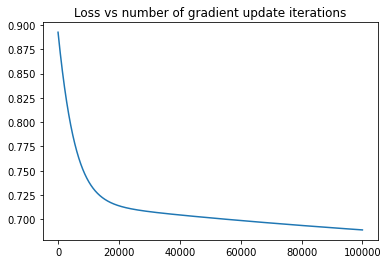

In [65]:
print("Weights after training ",model.weight)
plt.plot(model.losses)
plt.title("Loss vs number of gradient update iterations")
plt.show()

Model is trained
59.70149253731343
[ 1.2456192   0.60346726 -0.18786017 -1.50157674 -1.90058235]


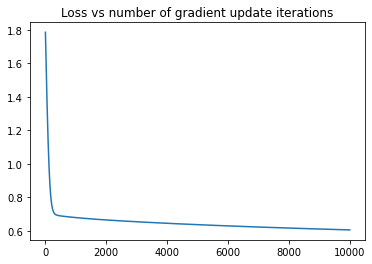

In [66]:
#Changing hyperparameters
#On increasing the learning rate and reducing the no of iterations
model=LogitRegression(0.01,10000,x_train,y_train)
model.fit(x_train, y_train)
y_pred = model.predict(x_test,0.5)
accuracy = model.accuracy(y_test.values.tolist(),y_pred)
print(accuracy)
print(model.weight)
plt.plot(model.losses)
plt.title("Loss vs number of gradient update iterations")
plt.show()

Model is trained
68.65671641791045
[  5.32489973   3.95943914  -0.79383889   2.00468118 -19.44936326]


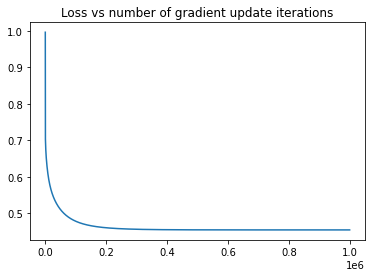

In [70]:
#Changing hyperparameters
#On increasing the learning rate and increasing the no of iterations
model=LogitRegression(0.01,1000000,x_train,y_train)
model.fit(x_train, y_train)
y_pred = model.predict(x_test,0.5)
accuracy = model.accuracy(y_test.values.tolist(),y_pred)
print(accuracy)
print(model.weight)
plt.plot(model.losses)
plt.title("Loss vs number of gradient update iterations")
plt.show()

In [71]:
weights = model.weight
import pickle
with open('weights.pkl', 'wb') as f:
  pickle.dump(weights, f)
from google.colab import files
files.download('weights.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model is trained
52.23880597014925
[0.67016416 0.86757511 0.51930089 0.27304134 0.90904396]


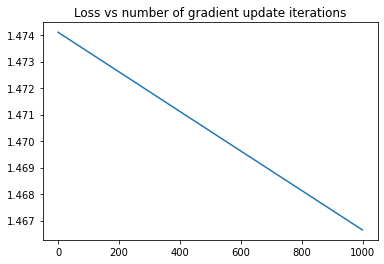

In [68]:
#Changing hyperparameters
#On reducing the learning rate and reducing the no of iterations
model=LogitRegression(0.00001,1000,x_train,y_train)
model.fit(x_train, y_train)
y_pred = model.predict(x_test,0.5)
accuracy = model.accuracy(y_test.values.tolist(),y_pred)
print(accuracy)
print(model.weight)
plt.plot(model.losses)
plt.title("Loss vs number of gradient update iterations")
plt.show()

Model is trained
52.23880597014925
[-0.04964251  0.45157222  0.15805328  0.64491285  0.73158379]


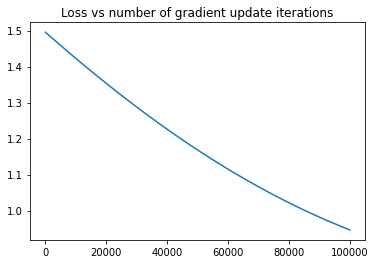

In [69]:
#Changing hyperparameters
#On reducing the learning rate and increasing the no of iterations
model=LogitRegression(0.00001,100000,x_train,y_train)
model.fit(x_train, y_train)
y_pred = model.predict(x_test,0.5)
accuracy = model.accuracy(y_test.values.tolist(),y_pred)
print(accuracy)
print(model.weight)
plt.plot(model.losses)
plt.title("Loss vs number of gradient update iterations")
plt.show()

In [ ]:
model.weight

In [ ]:
weights = model.weight
import pickle
with open('weights.pkl', 'wb') as f:
  pickle.dump(weights, f)



In [ ]:
from google.colab import files
files.download('weights.pkl')